In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import time
from skimage import exposure
from skimage import img_as_float
from skimage import color
from skimage import io
import matplotlib


1. Load an image.



(256, 256)

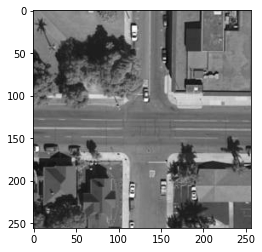

In [2]:
img = io.imread('intersection94.jpg')
imgGray = color.rgb2gray(img)
plt.imshow(imgGray, cmap="gray")
imgGray.shape

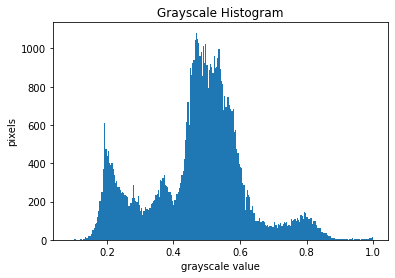

In [3]:
# create the histogra
image = imgGray.flatten()
# configure and draw the histogram figure
plt.figure()
plt.hist(image,bins=256)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.show()

2. Compute its negative.

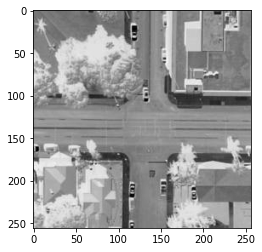

In [4]:
#negative
img_negative = 255-imgGray
plt.imshow(img_negative,cmap="gray")

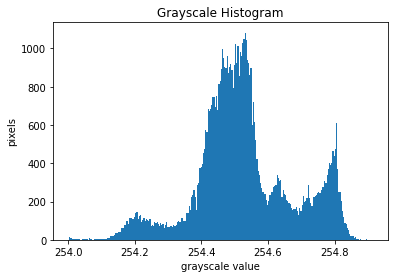

In [5]:
#negative histogram
image_n = img_negative.flatten()
# configure and draw the histogram figure
plt.figure()
plt.hist(image_n,bins=256)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.show()

3. Without & with a LUT, apply a gamma correction (report the efficiency gain)

In [6]:
def gamma_single_value(px,gamma):
    invGamma = 1/gamma
    res = (px/255) ** invGamma
    return(res)

def create_gamma_LUT(gamma):
    lut_ls = []
    for i in range(0,255+1):
        lut_ls.append(gamma_single_value(i,gamma))
    lut_ar = np.array(lut_ls)
    return(lut_ar)

In [7]:
# Calculate time for pixel based gamma
start_time = time.time()

new_image_ls = []
for row in imgGray:
    new_row = []
    for px in row:
        new_row.append(gamma_single_value(px,2))
    new_image_ls.append(new_row)
gamma_image = np.array(new_image_ls)

end_time = time.time()
print("Elapsed time for pixel-based computation:\t\t\t\t",round(end_time-start_time,2),"s")


time.sleep(1)

Elapsed time for pixel-based computation:				 0.16 s


In [8]:
# calculate time for LUT-based gamma - with LUT creation
start_time = time.time()
lut_gamma_2 = create_gamma_LUT(2)
new_image_ls = []
for row in img:
    new_row = []
    for px in row:
        new_row.append(lut_gamma_2[px])
    new_image_ls.append(new_row)
gamma_image = np.array(new_image_ls)

end_time = time.time()
print("Elapsed time for LUT-based computation (including LUT creation):\t",round(end_time-start_time,3),"s")

time.sleep(1)

Elapsed time for LUT-based computation (including LUT creation):	 0.326 s


In [9]:
# calculate time for LUT-based gamma
start_time = time.time()
new_image_ls = []
for row in img:
    new_row = []
    for px in row:
        new_row.append(lut_gamma_2[px])
    new_image_ls.append(new_row)
gamma_image = np.array(new_image_ls)

end_time = time.time()
print("Elapsed time for LUT-based computation (with pre-existing LUT):\t\t",round(end_time-start_time,3),"s")



Elapsed time for LUT-based computation (with pre-existing LUT):		 0.289 s


4. Code the histogram equalization function.

The following method enhances an image with low contrast, using a method called histogram equalization, which “spreads out the most frequent intensity values” in an image. It’s a technique for adjusting the pixel values in an image to enhance the contrast by making those intensities more equal across the board. Typically, the histogram of an image will have something close to a normal distribution, but equalization aims for a uniform distribution.

In [10]:
matplotlib.rcParams['font.size'] = 8

def histogram_equal(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram."""
    image = img_as_float(image)
    ax_img, ax_hist = axes    #setting up the axes
    ax_cdf = ax_hist.twinx()  

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

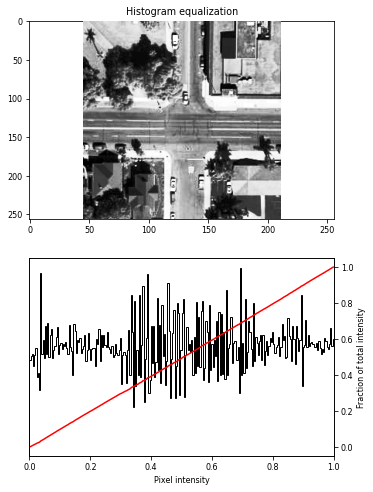

In [11]:
# Equalization
img_eq = exposure.equalize_hist(imgGray)

# Display results
fig = plt.figure(figsize=(12, 8))
axes = np.zeros((2, 2), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 2, 1)
axes[0] = fig.add_subplot(2, 2, 1, sharex=axes[0,0], sharey=axes[0,0])
axes[1] = fig.add_subplot(2, 2, 3)

ax_img, ax_hist, ax_cdf = histogram_equal(img_eq, axes[:, 0])
ax_img.set_title('Histogram equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 6))

plt.show()

5. Check if 
$histeq(negative(image))==negative(histeq(image))$.

(array([271., 256., 298., 261., 248., 253., 267., 274., 241., 248., 238.,
        250., 267., 246., 263., 253., 253., 261., 265., 263., 255., 282.,
        253., 315., 258., 254., 163., 374., 270., 244., 274., 303., 213.,
        271., 302., 221., 271., 278., 321., 231., 228., 279., 270., 307.,
        253., 232., 277., 258., 254., 240., 260., 287., 264., 275., 256.,
        235., 267., 244., 212., 282., 224., 280., 266., 234., 263., 277.,
        221., 355., 210., 249., 288., 313., 241., 204., 364., 192., 263.,
        189., 438., 146., 254., 222., 268., 266., 262., 215., 324., 260.,
        251., 188., 386., 178., 287., 190., 329., 188., 335., 173., 314.,
        232., 270., 206., 259., 199., 350., 171., 289., 313., 205., 177.,
        359., 336., 207., 322., 209., 357., 192., 277., 188., 270., 241.,
        261., 247., 300., 234., 136., 365., 333., 245., 142., 333., 356.,
        209., 135., 340., 285., 226., 134., 291., 402., 220., 165., 283.,
        232., 350., 169., 304., 199., 

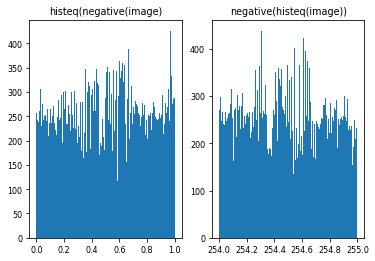

In [12]:
#computing histeq(negative(image))
#compute negative
negative= 255-imgGray
#compute histeq of negative
LHS=exposure.equalize_hist(negative)

#computing negative(histeq(image))
#compute histeq of image
histeq=exposure.equalize_hist(imgGray)
#compute negative of computed image
RHS=255-histeq

plt.subplot(1, 2, 1) # row 2, col 2 index 1
plt.title("histeq(negative(image)")
plt.hist(LHS.flatten(),bins=256)

plt.subplot(1, 2, 2) # index 2
plt.title("negative(histeq(image))")
plt.hist(RHS.flatten(),bins=256)


6. Perform a contrast stretch clipping the 5% extrema.

Contrast Stretching and Histogram Equalisation have the same goal: making the images to use entire range of values available to them.
Contrast stretching is all about increasing the difference between the maximum intensity value in an image and the minimum one. All the rest of the intensity values are spread out between this range.

Histogram equalization is about modifying the intensity values of all the pixels in the image such that the histogram is "flattened" (in reality, the histogram can't be exactly flattened, there would be some peaks and some valleys, but that's a practical problem).

In contrast stretching, there exists a one-to-one relationship of the intensity values between the source image and the target image i.e., the original image can be restored from the contrast-stretched image.

However, once histogram equalization is performed, there is no way of getting back the original image.

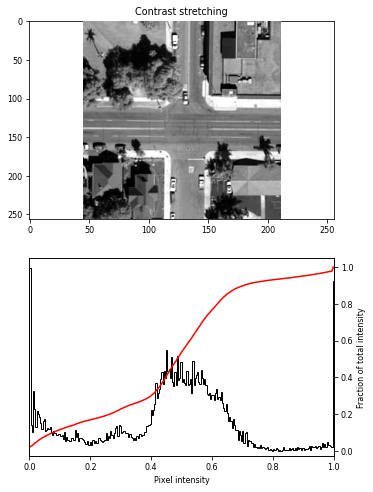

In [13]:
# Contrast stretching
p2, p98 = np.percentile(imgGray, (2, 98))
img_rescale = exposure.rescale_intensity(imgGray, in_range=(p2, p98))


# Display results
fig = plt.figure(figsize=(12, 8))
axes = np.zeros((2, 2), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 2, 1)
axes[0] = fig.add_subplot(2, 2, 1, sharex=axes[0,0], sharey=axes[0,0])
axes[1] = fig.add_subplot(2, 2, 3)

ax_img, ax_hist, ax_cdf = histogram_equal(img_rescale, axes[:, 0])
ax_img.set_title('Contrast stretching')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 6))

plt.show()

7. Play with multi-image operators (e.g. NDVI extraction, change detection, RGB
to gray)

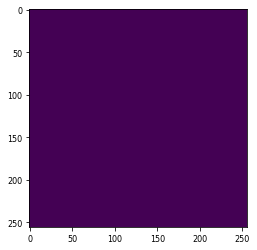

In [14]:
# Importing cv2 module
import cv2
# Applying NumPy addition on images
fimg = imgGray + negative
plt.imshow(fimg)

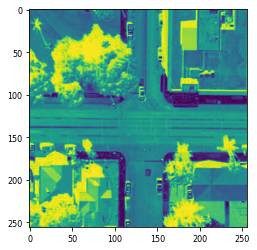

In [15]:
# Applying NumPy addition on images
sub = imgGray - img_rescale
plt.imshow(sub)